<h1 align='center'>Term Deposit Subscription Project</h1>

<h2>Business Understanding</h2>

The business focus for this project is to increase the rate of subscription for term deposit by identifying key factors that influence a customer's decision to subscribe.

This involves understanding customer behavior, market trends, and operational factors to develop actionable strategies for marketing and sales.

Project Objective: The objective of this project is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no").

The task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

<h3>Importing Necessary Libraries</h3>

In [100]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning, Preprocessing, and Hyperparameter Tuning
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve
from functools import partial

# Model Persistence
import joblib

# Other libraries
from warnings import filterwarnings
filterwarnings('ignore')

<h2>Data Understanding</h2>

1. Relevant Information:

   The data is related with direct marketing campaigns of a banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

3. Number of Attributes: 16 + output attribute.

4. Attribute information:

- bank client data:

   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

   9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)

- other attributes:

  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target):

  17. y - has the client subscribed a term deposit? (binary: "yes","no")


<h3>Hypothesis</h3>

<h4>Null Hypothesis: Age has no effect on the likelihood of subscribing to a term deposit.</h4>

<h4>Alternate Hypothsis: Age has a significant effect on the likelihood of subscribing to a term deposit.</h4>


<h3>Analytical Questions</h3>

1. What is the distribution for client subscription over the period? 

2. Which variables show the strongest correlation with subscription status?

3. Does the number of previous contacts affect the likelihood of subscription?

4. Which marketing channels have the highest conversion rates?

5. Do the month or day of contact influence subscription rates?

<h3>Exploratory Data Analysis (EDA)

In [3]:
# Import dataset
df = pd.read_csv("./data/bank-full.csv", delimiter=";")
df.head()   #View first 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset."

'There are 45211 rows and 17 columns in the dataset.'

In [5]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The result above shows there are no missing values in the dataset.

In [6]:
# Check for duplicates
f"There are {df.duplicated().sum()} duplicated values in the dataset."

'There are 0 duplicated values in the dataset.'

In [7]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Check unique variables in the columns
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
column_names = df.columns      # Assign column names to a variable

for name in column_names:      # Loop through the column names
    print(name,":", df[name].unique()) # Print unique values in the columns

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : [ 2143    29     2 ...  8205 14204 16353]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [ 261  151   76 ... 1298 1246 1556]
campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 

Insight:

After inspecting the columns for unique values, it was observed that "unknown" value in the columns contributes to a huge percentage of the dataset hence cannot be dropped as well as treated as missing values.

This means that, we are going to treat "unknown" as a separate category.

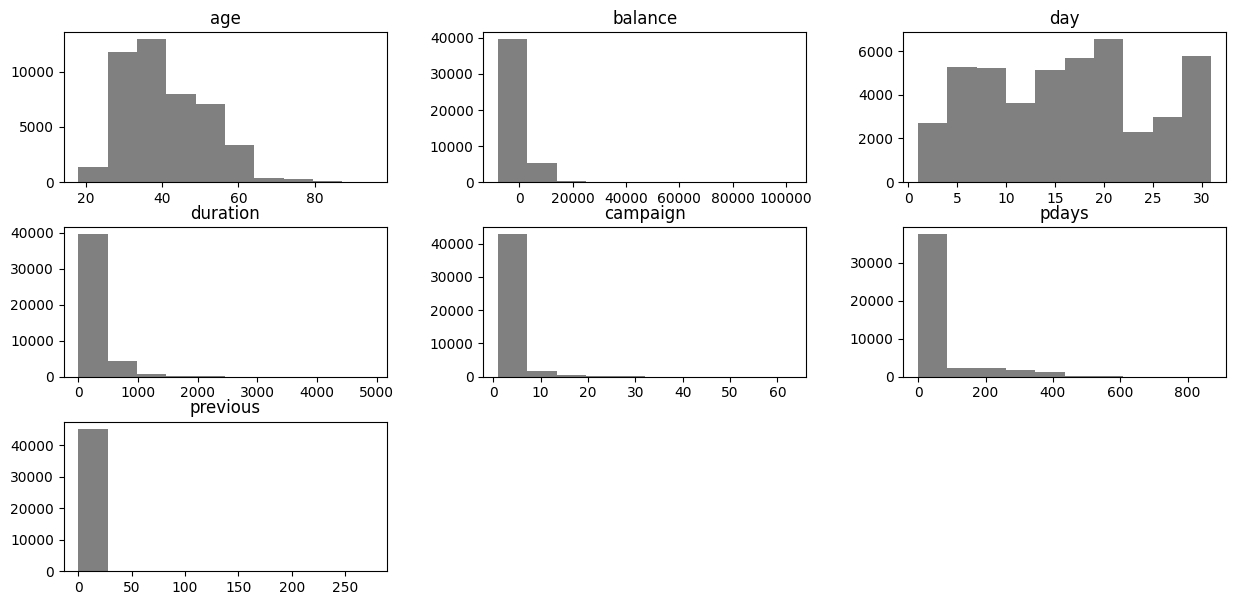

In [10]:
# Check the distribution of the numeric values
df.hist(figsize=(15, 7), grid=False, color="grey");

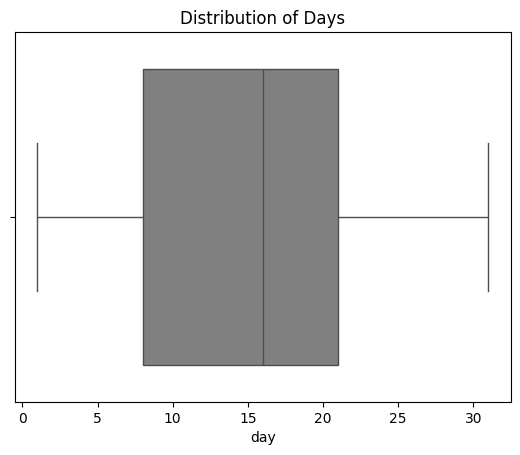

In [11]:
# Check the individual distribution of days column
sns.boxplot(df['day'], orient="h", color="grey")
plt.title("Distribution of Days")
plt.show()

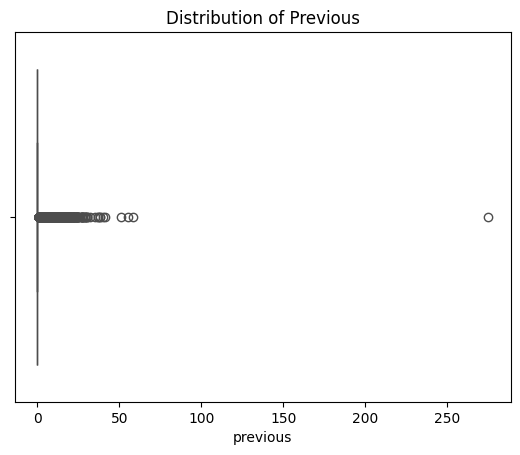

In [12]:
# Check the individual distribution of previous column
sns.boxplot(df['previous'], orient="h", color="grey")
plt.title("Distribution of Previous")
plt.show()

Insight:

The plot above shows the various distributions for the respective numerical columns. The age column has an approximately normal distribution and columns like balance, duration, campaign, pdays, and previous are all positively skewed.

The day column is normally distributed.

The various distributions for the respective columns apart from normally distributed columns will be corrected as it can have strong influence on our model.

In [32]:
# Check statistical description of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


The table above shows how the statistical description of the various columns in the data and their measures of central tendencies.

<h3> Answering Analytical Questions</h3>

1. What is the distribution for client subscription over the period? 

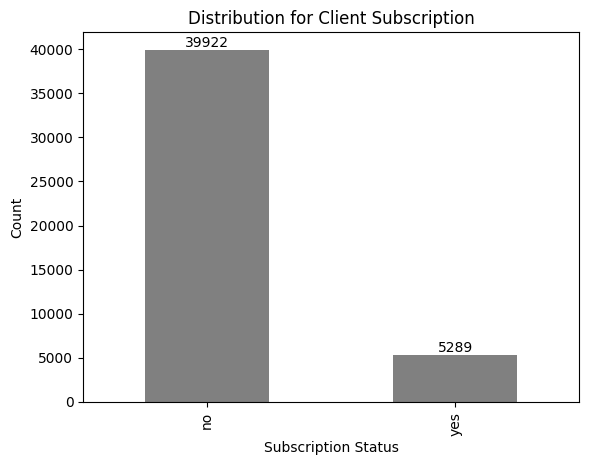

In [13]:
# Get count of subscriber and non-subscriber
subscriber_count = df["y"].value_counts()

ax = subscriber_count.plot(kind="bar", title="Distribution for Client Subscription", color='grey') # Create plot
ax.bar_label(ax.containers[0])     # Add bar labels
plt.xlabel("Subscription Status")  # Add x-axis label
plt.ylabel("Count")                # Add y-axis label
plt.show()


Insight:

The chart above shows us the distribution of subscribers and non-subscribers for term deposit.

We observe that there is a huge imbalance in the outcome/output column and this must be corrected else our model will be biased towards the output with the highest number.

2. Which variables show the strongest correlation with subscription status?

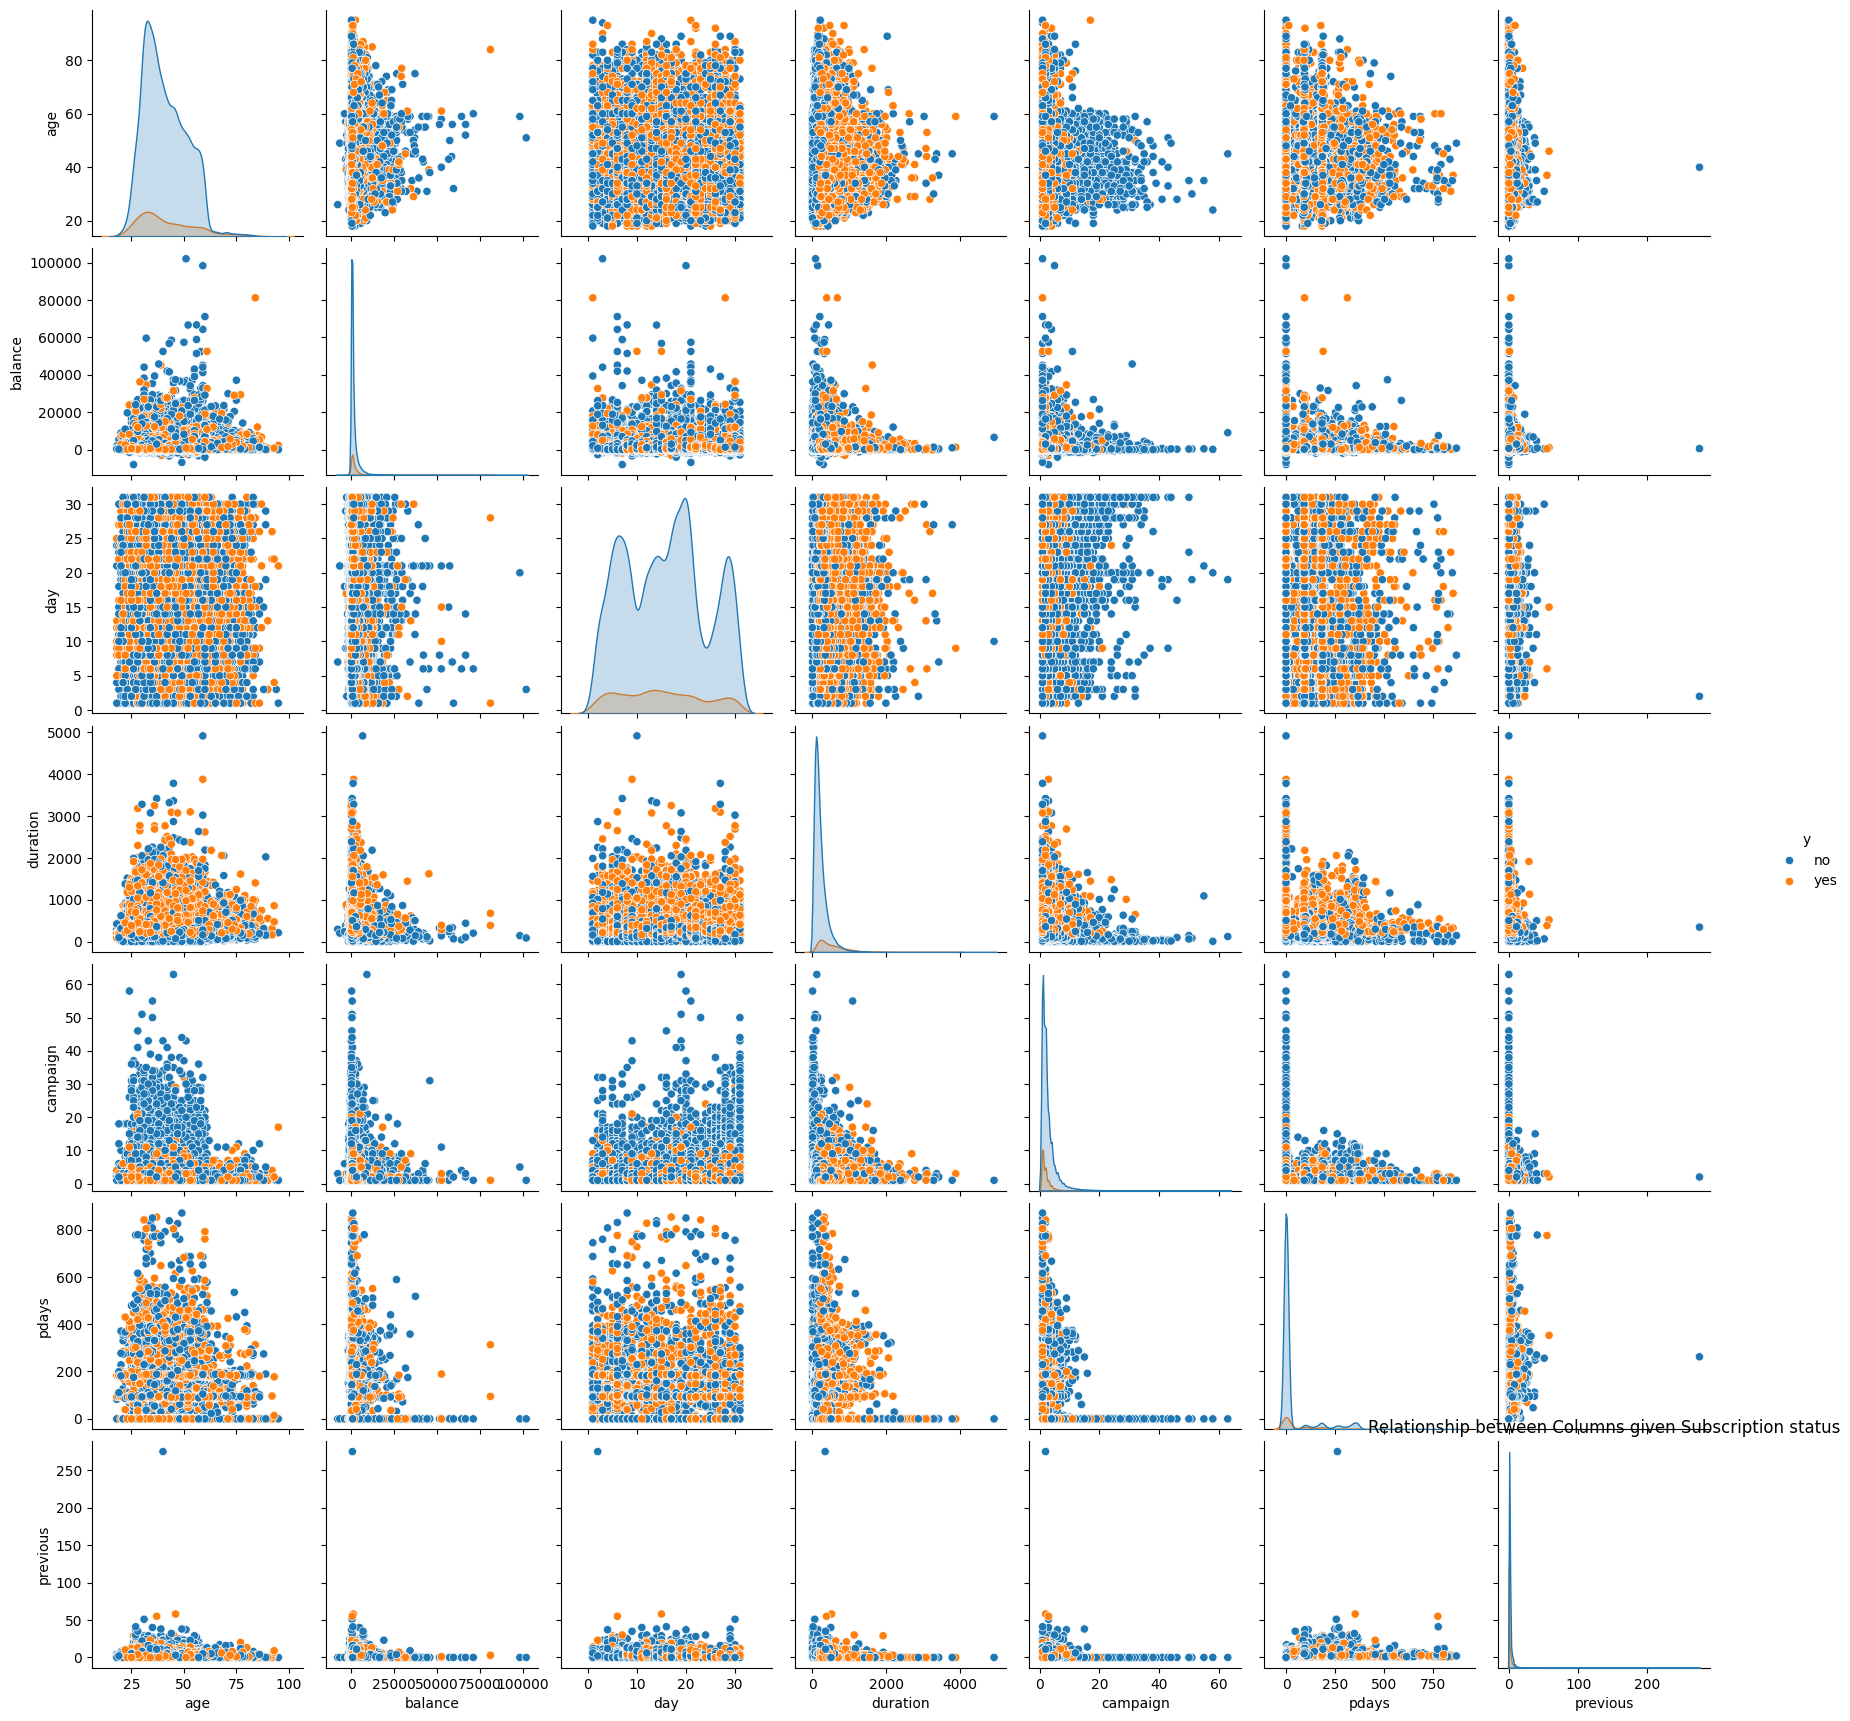

In [18]:
# Checking for numerical columns

sns.pairplot(df, hue="y")
plt.show()

Insight:

The plot above shows the relationship between numerical columns given the subscription status to help understand how the various features affect subscription status.

We observe that there is no positive relationship between between the features.

3. Does the month or day of contact influence subscription count?

In [36]:
# Month-wise subscription rate
month_rates = df[df['y'] == 'yes'].groupby('month').size() / df.groupby('month').size()

# Day-wise subscription rate
day_rates = df[df['y'] == 'yes'].groupby('day').size() / df.groupby('day').size()

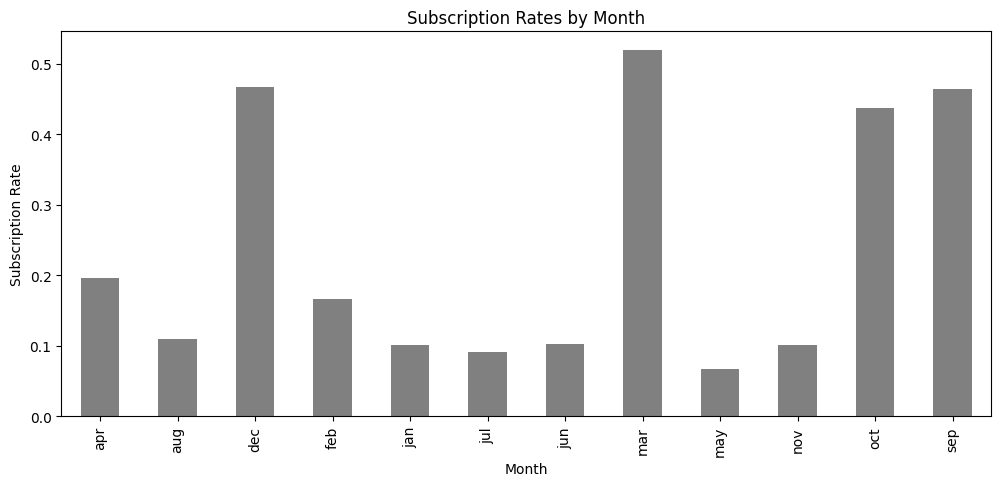

In [46]:
plt.figure(figsize=(12, 5))
month_rates.plot(kind='bar', color='grey')
plt.title('Subscription Rates by Month')
plt.ylabel('Subscription Rate')
plt.xlabel('Month')
plt.show()

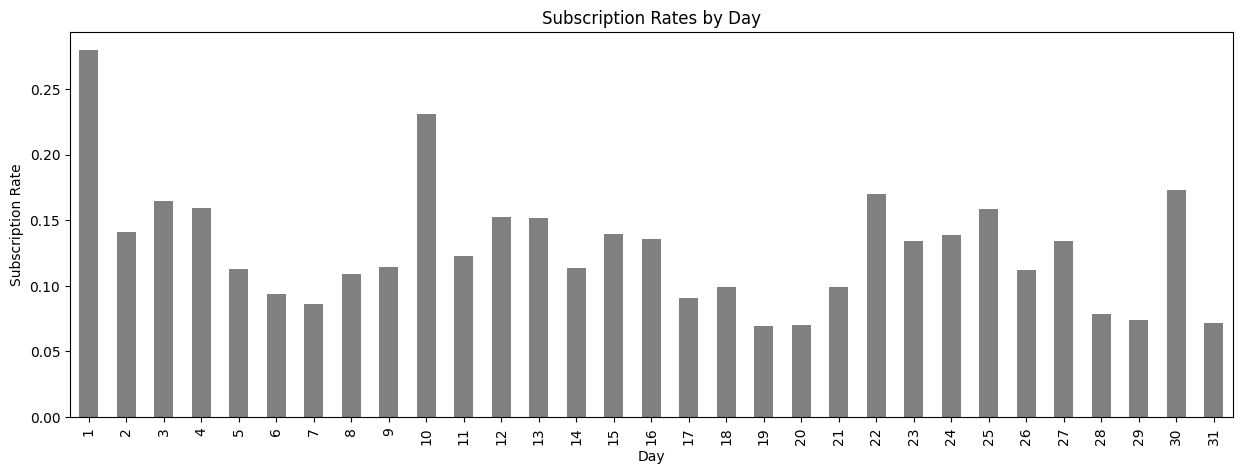

In [47]:
plt.figure(figsize=(15, 5))
day_rates.plot(kind='bar', color='grey')
plt.title('Subscription Rates by Day')
plt.ylabel('Subscription Rate')
plt.xlabel('Day')
plt.show()

Insight:

From the plots above, we see how 

4. Which marketing channels have the highest conversion count?

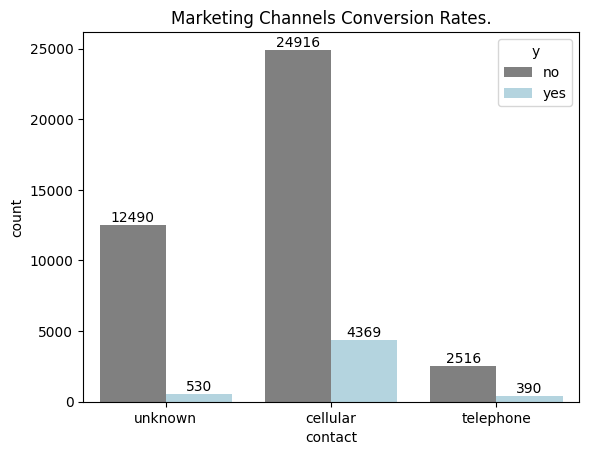

In [22]:
ax=sns.countplot(data=df, x='contact', hue='y', palette=['grey','lightblue'])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Marketing Channels Conversion Rates.')
plt.show()

Insight:

The channel for marketing from the chart has a significant impact on the coversion rates. The more we are able to reach potential subscribers, the more likely we are to get more people to subscribe. Contacting clients through cellular even thought recorded a lot of unsuccessfull attempts to get clients to sign, yet we see that it performed better compared to other channels.

5. Does the number of previous contacts affect the likelihood of subscription?

In [48]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

<Axes: xlabel='y', ylabel='previous'>

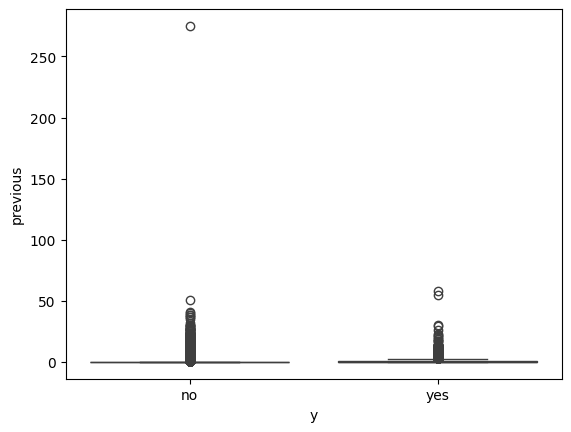

In [51]:
sns.boxplot(x='y', y='previous', data=df)

<Axes: >

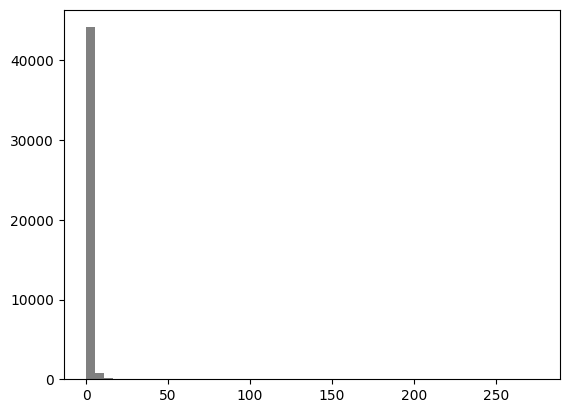

In [62]:
df['previous'].hist(bins=50, grid=False, color='grey')

<h2>Data Preprocessing</h2>

In [56]:
# Creat X and y split
X = df.drop('y', axis=1)
y = df['y']

In [60]:
# Split dataset into training and evaluation set
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Creating preprocessing pipeline to handle all the steps.

In [73]:
numerical_columns = X.select_dtypes(include='number').columns
categorical_columns = X.select_dtypes(exclude='number').columns

# Create a categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

# Create a numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('transformer', PowerTransformer()),
    ('scaler', StandardScaler())
])

# Full pipeline containing all transformers
full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])


# Encode output column
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_eval_encoded = label_encoder.transform(y_eval)

<h4>Model Training with Imbalanced Dataset</h4>

In [75]:
# Put classifier and classifier name into a list of tuples.
models = [
    ('dt_classifier', DecisionTreeClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn_classifier', KNeighborsClassifier()),
    ('gb_classifier', GradientBoostingClassifier(random_state=42)),
    ('sv_classifier', SVC(probability=True, random_state=42))
]

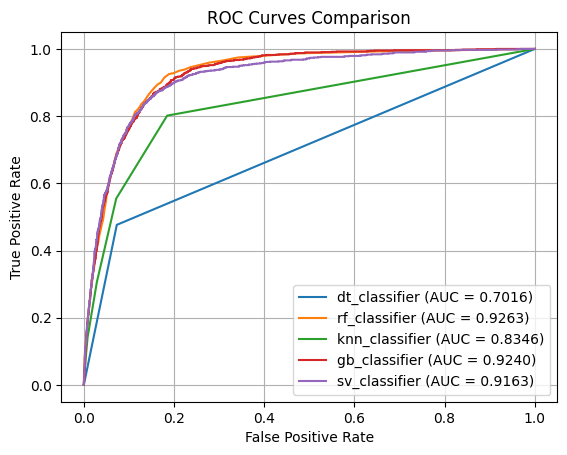

,Model,Accuracy,Precision,Recall,f1_score
0,dt_classifier,0.874157,0.875706,0.874157,0.874918
1,rf_classifier,0.905231,0.892900,0.905231,0.894806
2,knn_classifier,0.893288,0.874946,0.893288,0.878278
3,gb_classifier,0.905452,0.893592,0.905452,0.895804
4,sv_classifier,0.903793,0.889717,0.903793,0.887795


In [ ]:
unbalanced_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])

for model, classifier in models:
    pipeline = Pipeline([
        ('preprocessor', full_pipeline),
        ('classifer', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    # Predict y values for the evaluate dataset
    y_pred = pipeline.predict(X_eval)

    # Print accuracy, precision, recal, and f1_score for all models
    unbalanced_dataset_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = unbalanced_dataset_dict['accuracy']
    precision = unbalanced_dataset_dict['weighted avg']['precision']
    recall = unbalanced_dataset_dict['weighted avg']['recall']
    f1_score = unbalanced_dataset_dict['weighted avg']['f1-score']

    unbalanced_df.loc[len(unbalanced_df)] = [model, accuracy, precision, recall, f1_score]

    # Define model predictions for the model and true labels
    pred_proba = pipeline.predict_proba(X_eval)[:,1]

    # Calculate FPR, and TPR for each model
    fpr, tpr, threshold = roc_curve(y_eval_encoded, pred_proba)

    # Calculate AUC for the model
    auc_score = auc(fpr, tpr)

    # Plot ROC curves
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.4f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

unbalanced_df

<h4>Model Training with Balanced Dataset - RandomOver Sampler</h4>

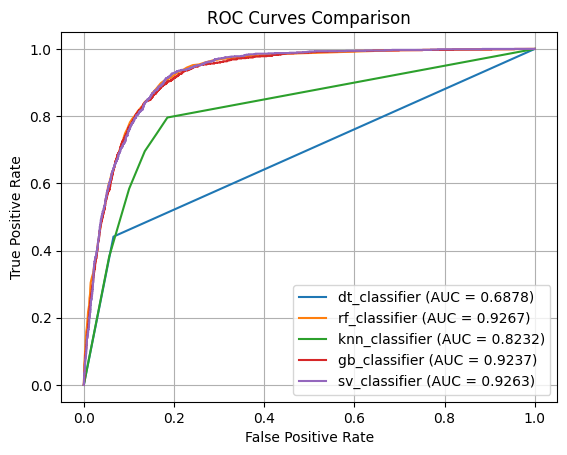

,Model,Accuracy,Precision,Recall,f1_score
0,dt_classifier,0.876590,0.873263,0.876590,0.874857
1,rf_classifier,0.904899,0.899578,0.904899,0.901806
2,knn_classifier,0.844963,0.891078,0.844963,0.861545
3,gb_classifier,0.842641,0.913998,0.842641,0.864210
4,sv_classifier,0.849276,0.915388,0.849276,0.869327


In [ ]:
ros_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])

for model, classifier in models:
    ros_pipeline = Pipeline([
        ('randomover_sampler', RandomOverSampler(random_state=42)),
        ('preprocessor', full_pipeline),
        ('classifer', classifier),
    ])

    ros_pipeline.fit(X_train, y_train_encoded)

    # Predict y values for the evaluate dataset
    y_pred = ros_pipeline.predict(X_eval)

    # Print accuracy, precision, recal, and f1_score for all models
    ros_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = ros_dict['accuracy']
    precision = ros_dict['weighted avg']['precision']
    recall = ros_dict['weighted avg']['recall']
    f1_score = ros_dict['weighted avg']['f1-score']

    ros_df.loc[len(ros_df)] = [model, accuracy, precision, recall, f1_score]

    # Define model predictions for the model and true labels
    pred_proba = ros_pipeline.predict_proba(X_eval)[:,1]

    # Calculate FPR, and TPR for each model
    fpr, tpr, threshold = roc_curve(y_eval_encoded, pred_proba)

    # Calculate AUC for the model
    auc_score = auc(fpr, tpr)

    # Plot ROC curves
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.4f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

ros_df

<h4>Model Training with Balanced Dataset - SMOTE Sampler</h4>

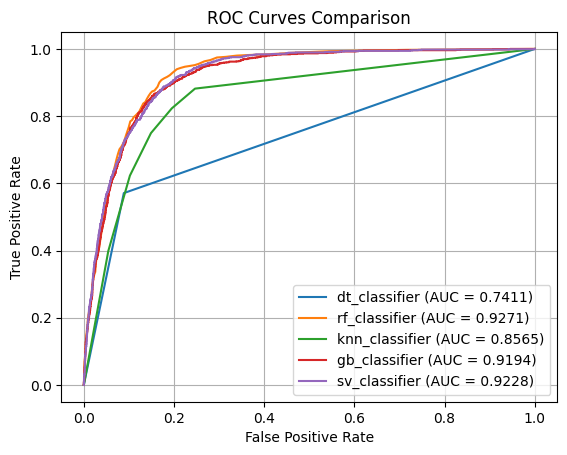

,Model,Accuracy,Precision,Recall,f1_score
0,dt_classifier,0.871503,0.885011,0.871503,0.877350
1,rf_classifier,0.900807,0.902248,0.900807,0.901505
2,knn_classifier,0.839213,0.896675,0.839213,0.858711
3,gb_classifier,0.874931,0.911148,0.874931,0.887218
4,sv_classifier,0.865531,0.909515,0.865531,0.880138


In [108]:
smote_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])
all_models = {}

for model, classifier in models:
    s_pipeline = Pipeline([
        ('preprocessor', full_pipeline),
        ('smote_sampler', SMOTE(random_state=42)),
        ('classifer', classifier),
    ])

    all_models[model] = classifier

    s_pipeline.fit(X_train, y_train_encoded)

    # Predict y values for the evaluate dataset
    y_pred = s_pipeline.predict(X_eval)

    # Print accuracy, precision, recal, and f1_score for all models
    smote_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']

    smote_df.loc[len(smote_df)] = [model, accuracy, precision, recall, f1_score]

    # Define model predictions for the model and true labels
    pred_proba = s_pipeline.predict_proba(X_eval)[:,1]

    # Calculate FPR, and TPR for each model
    fpr, tpr, threshold = roc_curve(y_eval_encoded, pred_proba)

    # Calculate AUC for the model
    auc_score = auc(fpr, tpr)

    # Plot ROC curves
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.4f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

smote_df

Insights:

A recall of 90% means we’re identifying most potential subscribers, and the precision of 90% indicates most marketing efforts being helpful.

Comparing imbalanced, random over sampler, and smote sampled dataset we relize that RandomForest Classifier  with smote sampler performed very well using f1-score as a metric for measuring the performace of the model since it is a harmony between precision and recall.

We are sticking with the f1-score because the dataset originally came with imbalanced target variable.

<h4>Hyperparameter Tuning Best Performing Models</h4>

In [113]:
# Define the hyperparameter space
param_dist = {
    'classifier__n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=20)],
    'classifier__max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

In [114]:
rf_classifier = all_models['rf_classifier']
# Create the RandomForest Classifer pipeline

rf_classifier_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
    ])

# Define model predictions for the model and true labels
pred_proba = rf_classifier_pipeline.predict_proba(X_eval)[:,1]
# Calculate FPR and TPR for the model
fpr, tpr, threshold = roc_curve(y_eval_encoded, pred_proba)
# Calculate AUC for the model
auc_score = auc(fpr, tpr)

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(rf_classifier_pipeline, param_distributions=param_dist, random_state=42)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('transformer',
                                                                                                PowerTransformer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                                              ('cat_pipeline',
                                                                               Pipeline(steps=[('imputer',
                                                                                                S...
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50, 60,
                                                                  70, 80, 90,
                                                                  100, 110,
                                                                  None],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [10, 14, 19,
                                                                     24, 28, 33,
                                                                     38, 43, 47,
                                                                     52, 57, 62,
                                                                     66, 71, 76,
                                                                     81, 85, 90,
                                                                     95, 100]},
                   random_state=42)

In [115]:
best_parameters = random_search.best_params_
best_parameters

{'classifier__n_estimators': 28,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 2,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 110,
 'classifier__bootstrap': False}

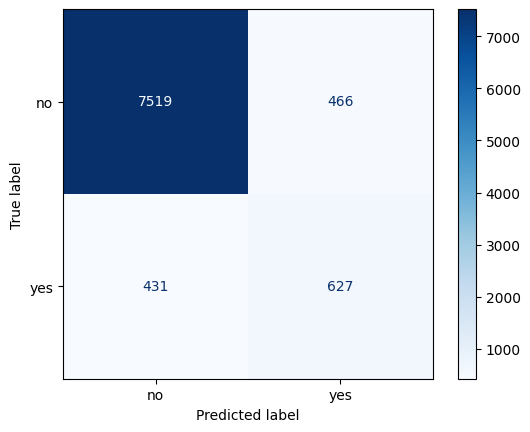

In [116]:
predict = rf_classifier_pipeline.predict(X_eval)
conf = confusion_matrix(y_eval_encoded, predict)

ConfusionMatrixDisplay(conf, display_labels=label_encoder.classes_).plot(cmap='Blues');

In [117]:
eval_prediction_r = pd.Series(label_encoder.inverse_transform(predict))

In [118]:
eval_prediction_r.value_counts()

no     7950
yes    1093
Name: count, dtype: int64

<h4>Model Persistence</h4>

In [119]:
joblib.dump(rf_classifier_pipeline, './model/RandomForest_model.joblib')
joblib.dump(label_encoder, './model/label_encoder.joblib')

['./model/label_encoder.joblib']

In [136]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)